In [1]:
# Importing necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1.Data Understanding/Data Cleansing

In [3]:
#Loading the loan dataset
df_loan = pd.read_csv('loan.csv')
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# Columns information of the dataset
df_loan.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [5]:
#This way it shows the maximum columns/rows possible.
pd.set_option("display.max_columns" , None)
pd.set_option("display.max_rows" , None)

In [6]:
#Finding out number of null values for each column
df_loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12942
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [7]:
#Columns with all values as null/NA to be dropped.
df_loan = df_loan.dropna(axis=1, how='all')

In [8]:
#Finding out number of null values for each column again
df_loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [9]:
#Few columns are having unique values which is not useful for data analysis, so we will drop those columns too
df_loan.drop(df_loan.columns[df_loan.apply(lambda col: col.nunique() == 1)], axis=1, inplace=True)

#Few columns are having nearly more than 50% of values as NA, we can drop those columns also("next_pymnt_d", "mths_since_last_record", "mths_since_last_delinq")
df_loan = df_loan .drop(columns=["next_pymnt_d", "mths_since_last_record", "mths_since_last_delinq"])

## 1.1 Data understanding and removing the unnecessary columns for analysis

In [11]:
df_loan.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

### Among the above mentioned columns
1) **id**, **member_id** columns to be dropped as they are index variables and do not participate to the analysis.
2) **emp_title**, **title**, **url** and **desc** has various values which are not helpful for analysis.
3) **zip_code** info is already present in addr_state.
4) We can remove the data which doesn't provide any information for analytics: 
   * **earliest_cr_line** - The month the borrower's earliest reported credit line was opened.
   * **collection_recovery_fee** - Number of collections in 12 months excluding medical collections.
   * **last_pymnt_amnt** - The month the borrower's earliest reported credit line was opened.
   * **recoveries** - post charge off gross recovery.
   * **total_rec_prncp** - Principal received to date.
   * **total_rec_int** - Interest received to date.
   * **total_pymnt** - Payments received to date for total amount funded.
   * **out_prncp** - Remaining outstanding principal for total amount funded.
   * **last_credit_pull_d** - The most recent month LC pulled credit for this loan.
   * **total_rec_late_fee** - Late fees received to date.
   * **delinq_2yrs** - The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.
   * **last_pymnt_d** - Last month payment was received.d.ed.


In [13]:
#Removing the above mentioned unnecessary columns
df_loan = df_loan.drop(columns=["id", "member_id", "emp_title", "title", "url", "desc", "zip_code", "earliest_cr_line", "collection_recovery_fee", "last_pymnt_amnt", "recoveries", "total_rec_prncp", "total_rec_int", "total_pymnt", "out_prncp", "last_credit_pull_d", "total_rec_late_fee", "delinq_2yrs", "last_pymnt_d"])

In [14]:
df_loan.shape

(39717, 26)

## 1.2 Handling missing values

In [16]:
#Checking the number of missing values in all the columns again
df_loan.isnull().sum().sort_values(ascending=False)

emp_length              1075
pub_rec_bankruptcies     697
revol_util                50
purpose                    0
total_pymnt_inv            0
out_prncp_inv              0
total_acc                  0
revol_bal                  0
pub_rec                    0
open_acc                   0
inq_last_6mths             0
dti                        0
addr_state                 0
loan_amnt                  0
funded_amnt                0
issue_d                    0
verification_status        0
annual_inc                 0
home_ownership             0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
funded_amnt_inv            0
loan_status                0
dtype: int64

In [17]:
#Analysing the values of emp_length column
df_loan.emp_length.value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [18]:
#As values are mostly equally distributed in emp_length column we can drop the rows with NA value for emp_length
df_loan = df_loan.dropna(subset=["emp_length"])

In [19]:
#Analysing the values of pub_rec_bankruptcies column
df_loan.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    36375
1.0     1563
2.0        7
Name: count, dtype: int64

In [20]:
#As more than 95% rows have 0 value we can replace the null rows with the mode value.
df_loan['pub_rec_bankruptcies'].replace(np.nan, df_loan['pub_rec_bankruptcies'].mode()[0], inplace=True)

In [21]:
#Checking the number of missing values in all the columns again
df_loan.isnull().sum().sort_values(ascending=False)

revol_util              47
loan_amnt                0
funded_amnt              0
total_pymnt_inv          0
out_prncp_inv            0
total_acc                0
revol_bal                0
pub_rec                  0
open_acc                 0
inq_last_6mths           0
dti                      0
addr_state               0
purpose                  0
loan_status              0
issue_d                  0
verification_status      0
annual_inc               0
home_ownership           0
emp_length               0
sub_grade                0
grade                    0
installment              0
int_rate                 0
term                     0
funded_amnt_inv          0
pub_rec_bankruptcies     0
dtype: int64

## 1.3 Handling type casting

In [23]:
#Let's check the data type of columns to see if we need to do any type casting
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38642 non-null  int64  
 1   funded_amnt           38642 non-null  int64  
 2   funded_amnt_inv       38642 non-null  float64
 3   term                  38642 non-null  object 
 4   int_rate              38642 non-null  object 
 5   installment           38642 non-null  float64
 6   grade                 38642 non-null  object 
 7   sub_grade             38642 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        38642 non-null  object 
 10  annual_inc            38642 non-null  float64
 11  verification_status   38642 non-null  object 
 12  issue_d               38642 non-null  object 
 13  loan_status           38642 non-null  object 
 14  purpose               38642 non-null  object 
 15  addr_state            38

In [24]:
#Before we have derived the different values for emp_length and found they vary from <1 year to 10+ years , we can convert this to integer value taking <1 year as 0 as 10+ years as 10
#Function to replace values
def clean_empLength(val):
    val = val.replace("years","").replace("year","")
    if val == "10+ ":
        val = "10"
    elif val == "< 1 ":
        val = "0"        
    return val
df_loan.emp_length = df_loan.emp_length.apply(clean_empLength)
#Checking the values of emp_length now
df_loan.emp_length.value_counts()

df_loan.emp_length.dtype
#The datatype is still object so to convert it to integer
df_loan.emp_length = df_loan.emp_length.astype("int32")
df_loan.emp_length.value_counts()

emp_length
10    8879
0     4583
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: count, dtype: int64

In [25]:
# According to our problem statement we need to find who are most likely to default
df_loan.loan_status.value_counts()

loan_status
Fully Paid     32145
Charged Off     5399
Current         1098
Name: count, dtype: int64

In [26]:
# So removing the rows whose loan_status is CURRENT right now as it will not help in our analysis.
df_loan = df_loan[df_loan.loan_status != "Current"]
df_loan.loan_status.value_counts()

loan_status
Fully Paid     32145
Charged Off     5399
Name: count, dtype: int64

In [27]:
#Check whether there are any duplicate rows
df_loan.duplicated().sum()

0

In [28]:
#int_rate is a very important field to analyze, so let's convert it to float datatype as currently it is an object.
df_loan.int_rate.value_counts()
df_loan.int_rate = df_loan.int_rate.apply(lambda x: x[:-1])
df_loan.int_rate.value_counts()
df_loan.int_rate = df_loan.int_rate.astype("float64")

In [29]:
# There is a column issue_d which has month and year in the format of Mnth-YY, so we can extract month and year from this column.
# Before that let's convert this column to date time format
df_loan.issue_d = pd.to_datetime(df_loan.issue_d, format='%b-%y')
df_loan.issue_d.value_counts()

issue_d
2011-12-01    1994
2011-11-01    1971
2011-10-01    1863
2011-09-01    1837
2011-08-01    1751
2011-06-01    1675
2011-07-01    1674
2011-05-01    1554
2011-04-01    1505
2011-03-01    1402
2011-01-01    1336
2011-02-01    1239
2010-12-01    1220
2010-11-01    1096
2010-07-01    1092
2010-10-01    1086
2010-09-01    1058
2010-08-01    1058
2010-06-01     996
2010-05-01     894
2010-04-01     806
2010-03-01     718
2010-02-01     605
2009-11-01     602
2009-12-01     598
2010-01-01     585
2009-10-01     545
2009-09-01     449
2009-08-01     408
2009-07-01     374
2009-06-01     356
2009-05-01     319
2009-04-01     290
2009-03-01     276
2009-02-01     260
2009-01-01     239
2008-03-01     236
2008-12-01     223
2008-11-01     184
2008-02-01     174
2008-01-01     171
2008-04-01     155
2008-10-01      96
2007-12-01      85
2008-07-01      83
2008-05-01      71
2008-08-01      71
2008-06-01      66
2007-10-01      47
2007-11-01      37
2007-08-01      33
2008-09-01      32
2007

In [30]:
# Now let's extract year and month from this and create 2 new columns issue_month, issue_year
df_loan['issue_month'] = df_loan['issue_d'].dt.month
df_loan['issue_year'] = df_loan['issue_d'].dt.year

In [31]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37544 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             37544 non-null  int64         
 1   funded_amnt           37544 non-null  int64         
 2   funded_amnt_inv       37544 non-null  float64       
 3   term                  37544 non-null  object        
 4   int_rate              37544 non-null  float64       
 5   installment           37544 non-null  float64       
 6   grade                 37544 non-null  object        
 7   sub_grade             37544 non-null  object        
 8   emp_length            37544 non-null  int32         
 9   home_ownership        37544 non-null  object        
 10  annual_inc            37544 non-null  float64       
 11  verification_status   37544 non-null  object        
 12  issue_d               37544 non-null  datetime64[ns]
 13  loan_status          

## 2.Data Analysis

### 2.1.Univariate analysis

#### 2.1.1 ANNUAL_INC

In [35]:
# Now let's explore a few important variables for analysis.
# One of the field which will be helpful to analyze the probability of loan getting default is annual income of the borrower.
df_loan.annual_inc.value_counts().sort_index(ascending=False)

annual_inc
6000000.00       1
3900000.00       1
2039784.00       1
1900000.00       1
1782000.00       1
1440000.00       1
1362000.00       1
1250000.00       1
1200000.00       4
1176000.00       1
1080000.00       1
948000.00        1
900000.00        4
889000.00        1
840000.00        1
828000.00        1
800000.00        1
780000.00        5
762000.00        1
756000.00        1
750000.00        2
741600.00        1
725000.00        1
720000.00        2
708000.00        1
700053.85        1
700000.00        2
667680.00        1
660000.00        1
648000.00        2
636000.00        1
616000.00        1
612000.00        1
600000.00        3
590000.00        1
576000.00        1
572400.00        1
564000.00        1
552000.00        1
550000.00        3
543000.00        1
540000.00        1
528000.00        1
525000.00        1
522000.00        1
510000.00        1
504000.00        1
500000.00        5
487000.00        1
480000.00        6
450000.00        2
445000.00        1
4

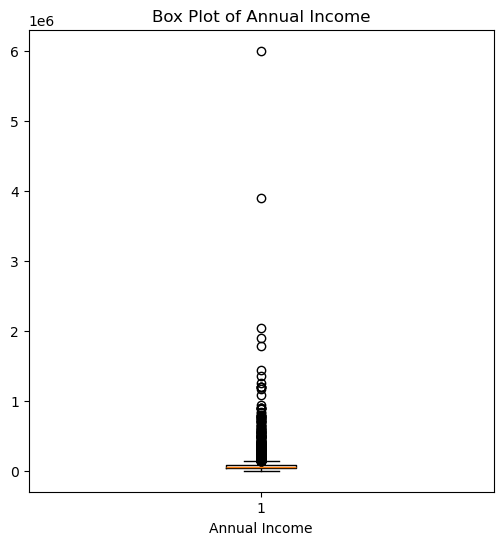

In [36]:
# This is difficult to understand so let's draw a box plot for annul_inc to know how many outliers are there.
plt.figure(figsize=(6, 6))
plt.boxplot(df_loan.annual_inc)
plt.title('Box Plot of Annual Income')
plt.xlabel('Annual Income')
plt.show()

In [37]:
df_loan.annual_inc.describe()

count    3.754400e+04
mean     6.940708e+04
std      6.467698e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [38]:
#let's findout the perntiles of 99 and 100
print('99 percentile:', df_loan.annual_inc.quantile(0.99))
print('100 percentile:', df_loan.annual_inc.quantile(1))

99 percentile: 235000.0
100 percentile: 6000000.0


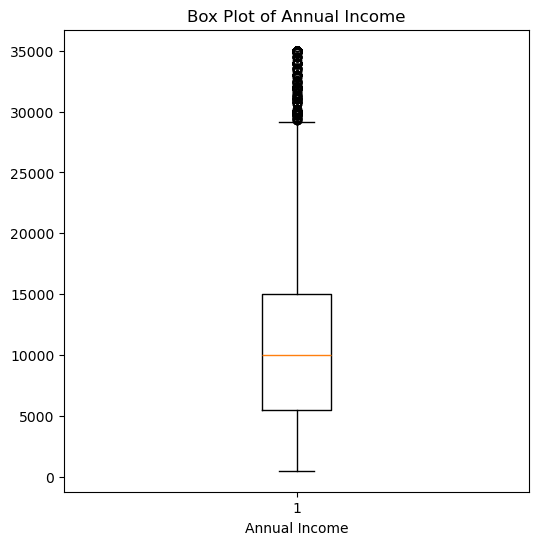

In [39]:
# let's draw a box plot for loan_amnt to know how many outliers are there.
plt.figure(figsize=(6, 6))
plt.boxplot(df_loan.loan_amnt)
plt.title('Box Plot of Annual Income')
plt.xlabel('Annual Income')
plt.show()

#### Observation: People with annual incomes of 40,000 to 60,000 are most likely to take loan

### 2.1.2 Home Ownership

In [42]:
df_loan.home_ownership.value_counts()

home_ownership
RENT        18078
MORTGAGE    16595
OWN          2770
OTHER          98
NONE            3
Name: count, dtype: int64

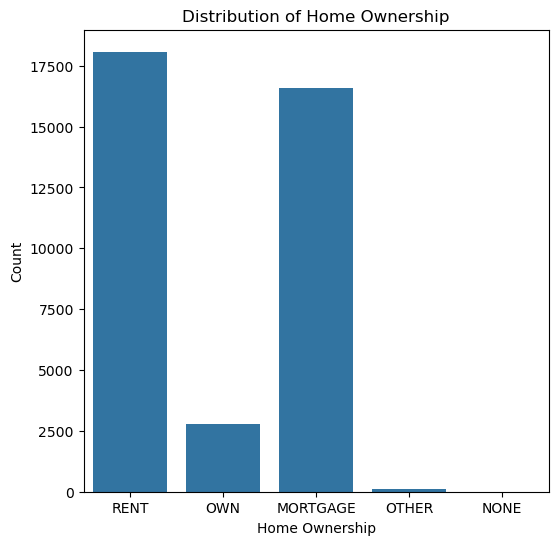

In [43]:
# Create a bar plot for home_ownership
plt.figure(figsize=(6, 6))
sns.countplot(x='home_ownership', data=df_loan)
plt.title('Distribution of Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.show()

#### Observation: People with own houses doesn't take loans much.

### 2.1.3 Purpose of loan

In [46]:
df_loan.purpose.value_counts()

purpose
debt_consolidation    17675
credit_card            4899
other                  3713
home_improvement       2785
major_purchase         2080
small_business         1710
car                    1448
wedding                 913
medical                 656
moving                  552
house                   354
vacation                348
educational             317
renewable_energy         94
Name: count, dtype: int64

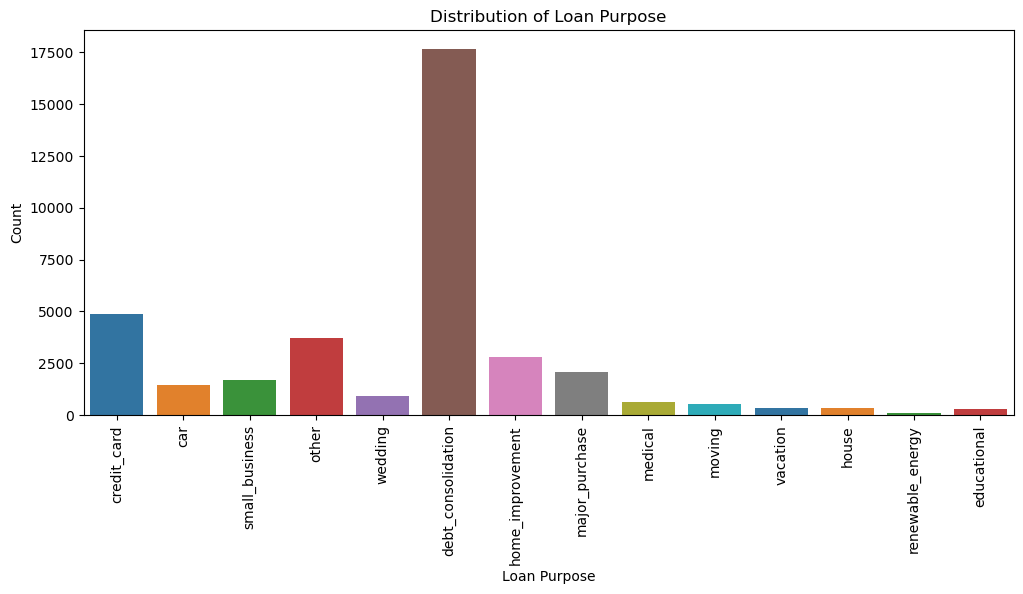

In [47]:
# Create a bar plot for purpose
plt.figure(figsize=(12,5))
sns.countplot(x='purpose', data=df_loan, palette="tab10")
plt.title('Distribution of Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#### Observation: Most people are taking loans for debt consolidation

### 2.1.4 Intrest rate and Loan Amount

Text(0.5, 0, 'LOAN AMOUNT')

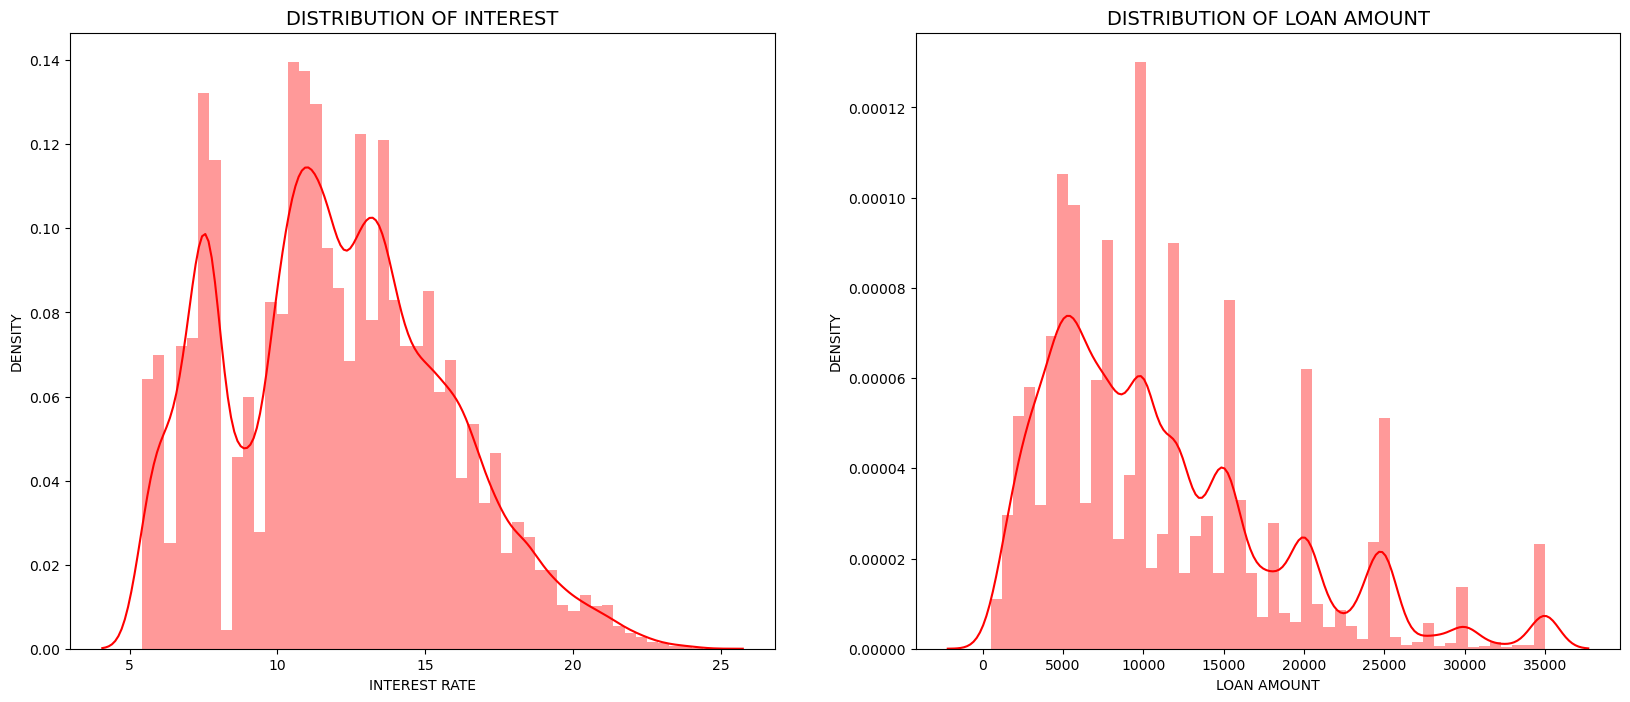

In [50]:
# Distribution plot for intrest rate
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
viz = sns.distplot(df_loan.int_rate, color='red')
viz.set_title('DISTRIBUTION OF INTEREST',fontsize=14,color='black')
viz.set_ylabel('DENSITY',fontsize =10,color = 'black')
viz.set_xlabel('INTEREST RATE',fontsize =10,color = 'black')
plt.subplot(1,2,2)
viz = sns.distplot(df_loan.loan_amnt, color='red')
viz.set_title('DISTRIBUTION OF LOAN AMOUNT',fontsize=14,color='black')
viz.set_ylabel('DENSITY',fontsize =10,color = 'black')
viz.set_xlabel('LOAN AMOUNT',fontsize =10,color = 'black')  

#### Observation: Most borrowers have an intrest rate of 10-13% and are taking loan amount of 5k-10k mostly

### 2.1.5 Issue month

Text(0.5, 0, 'ISSUE MONTH')

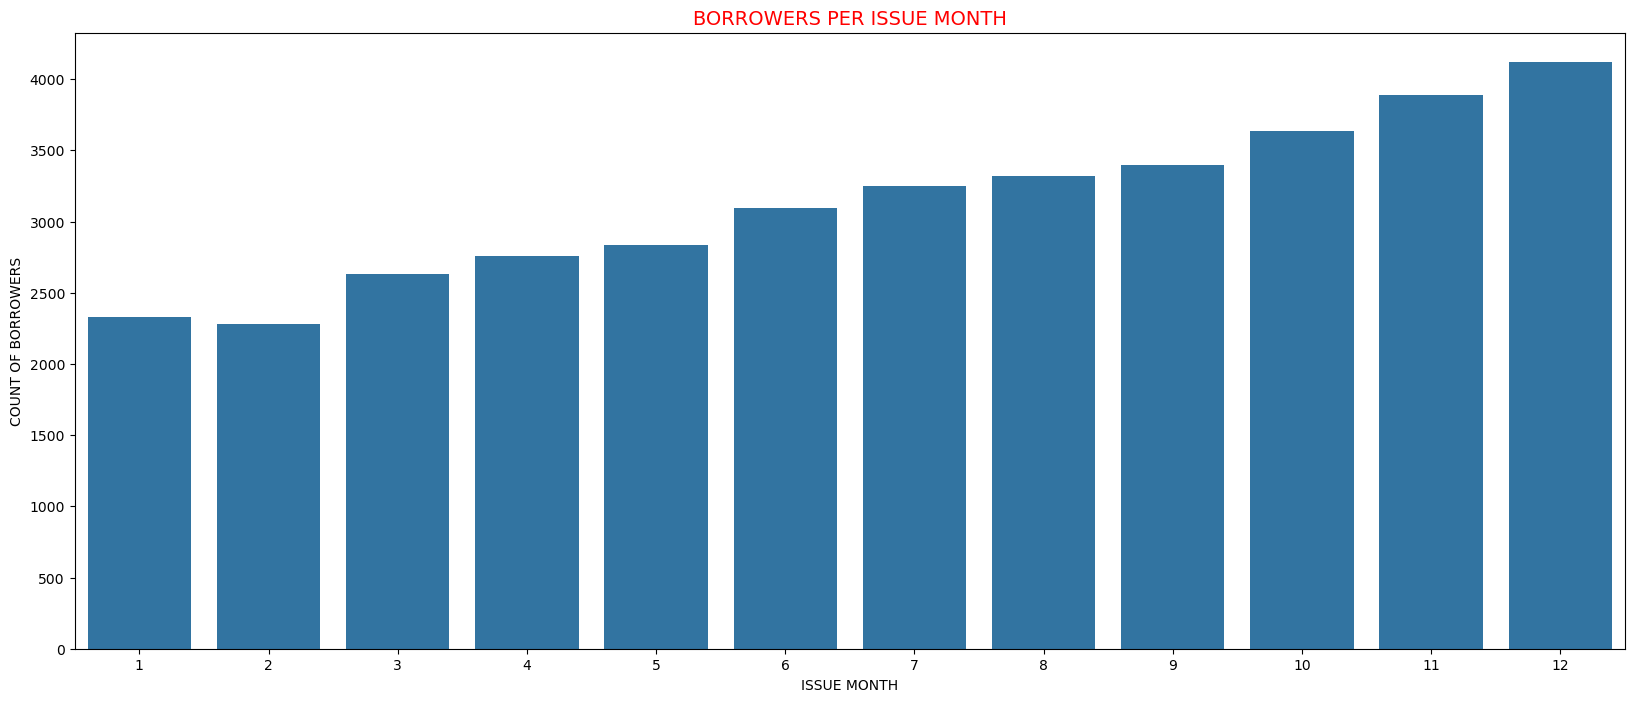

In [53]:
# We extracted a new column month from the issue date field, let's see how this has effect on borrowers taking loan.
plt.figure(figsize=(20,8))
viz = sns.countplot(x='issue_month', data = df_loan)
viz.set_title('BORROWERS PER ISSUE MONTH',fontsize=14,color='red')
viz.set_ylabel('COUNT OF BORROWERS',fontsize =10,color = 'black')
viz.set_xlabel('ISSUE MONTH',fontsize =10,color = 'black') 

#### Observation: Most borrowers take loans towards end of the year.

### 2.2.Bivariate analysis

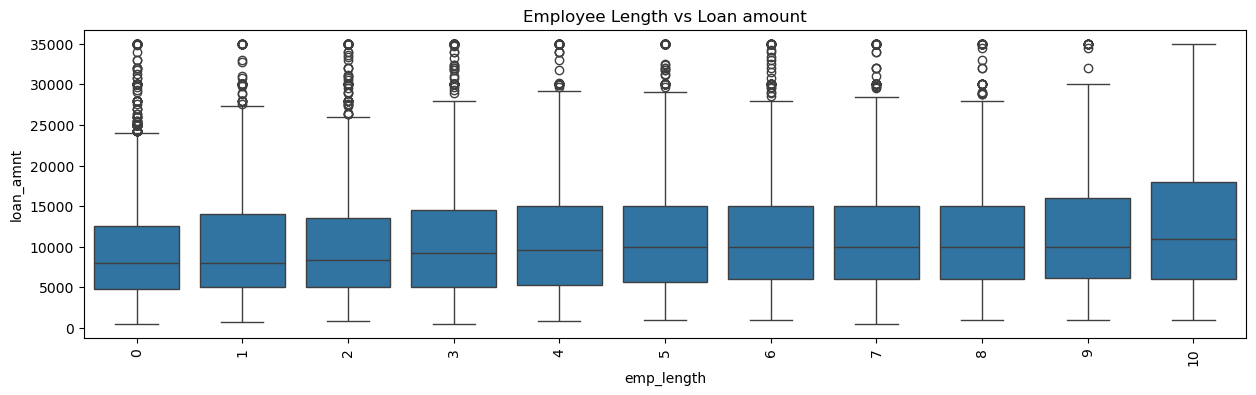

In [56]:
plt.figure(figsize=(15,4))
sns.boxplot(x="emp_length", y="loan_amnt", data=df_loan)
plt.title("Employee Length vs Loan amount")
plt.xticks(rotation=90)
plt.show()

#### Observation: The borrower who has 10 or more years of experience are taking high amount of loan than others.

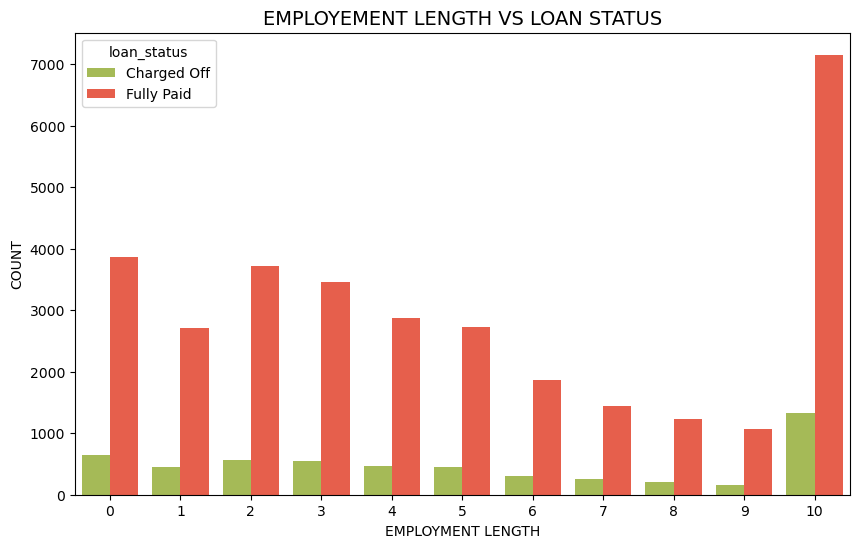

In [58]:
#Here we perform bivariate analysis against loan status mostly to get the analysis of defaulting the loan.
# Countplot for employment length by loan status as hue
plt.figure(figsize=(10,6))
ax = sns.countplot(x = df_loan['emp_length'],
              hue = df_loan['loan_status'],
              palette=['#AECB46', "#FF4C33"],
              data = df_loan)

# Naming the axis and title
ax.set_title('EMPLOYEMENT LENGTH VS LOAN STATUS',fontsize=14,color='black')
ax.set_ylabel('COUNT',fontsize =10,color = 'black')
ax.set_xlabel('EMPLOYMENT LENGTH',fontsize =10,color = 'black')
plt.show()

#### Observation: Most borowwers whose employement length is more than 10 years are likely to default.

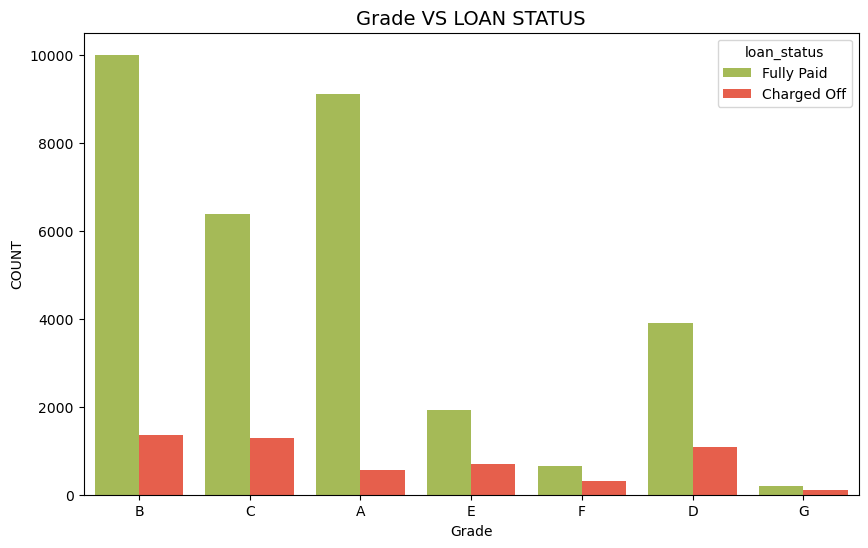

In [60]:
#Let's findout grade vs loan_status
plt.figure(figsize=(10,6))
ax = sns.countplot(x = df_loan['grade'],
              hue = df_loan['loan_status'],
              palette=['#AECB46', "#FF4C33"],
              data = df_loan)

# Naming the axis and title
ax.set_title('Grade VS LOAN STATUS',fontsize=14,color='black')
ax.set_ylabel('COUNT',fontsize =10,color = 'black')
ax.set_xlabel('Grade',fontsize =10,color = 'black')
plt.show()



#### Observation: Most borowers from grades B,C,D are likely to default.

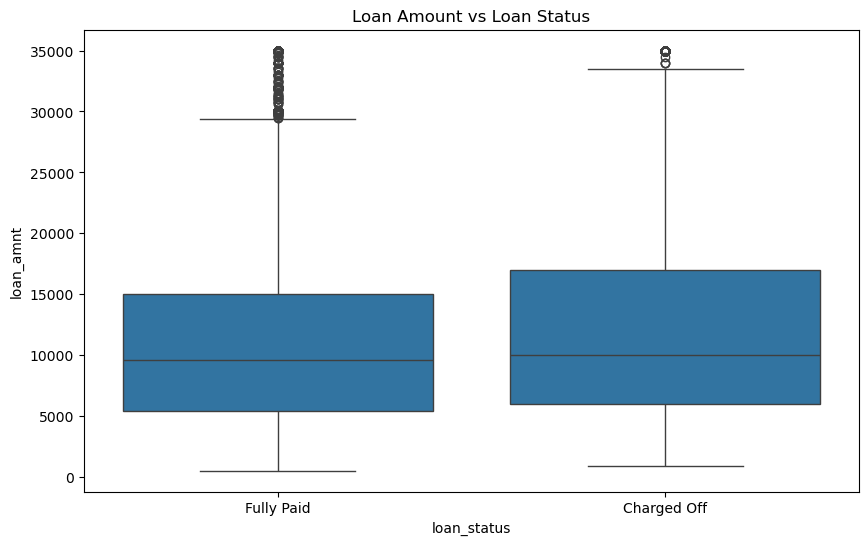

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=df_loan)
plt.title('Loan Amount vs Loan Status')
plt.show()

#### Observation: Till 50 percentile (mean), the chances of paying the loan and defaulting it are same, But as the loan amount increase the chances of defaulting is increasing.

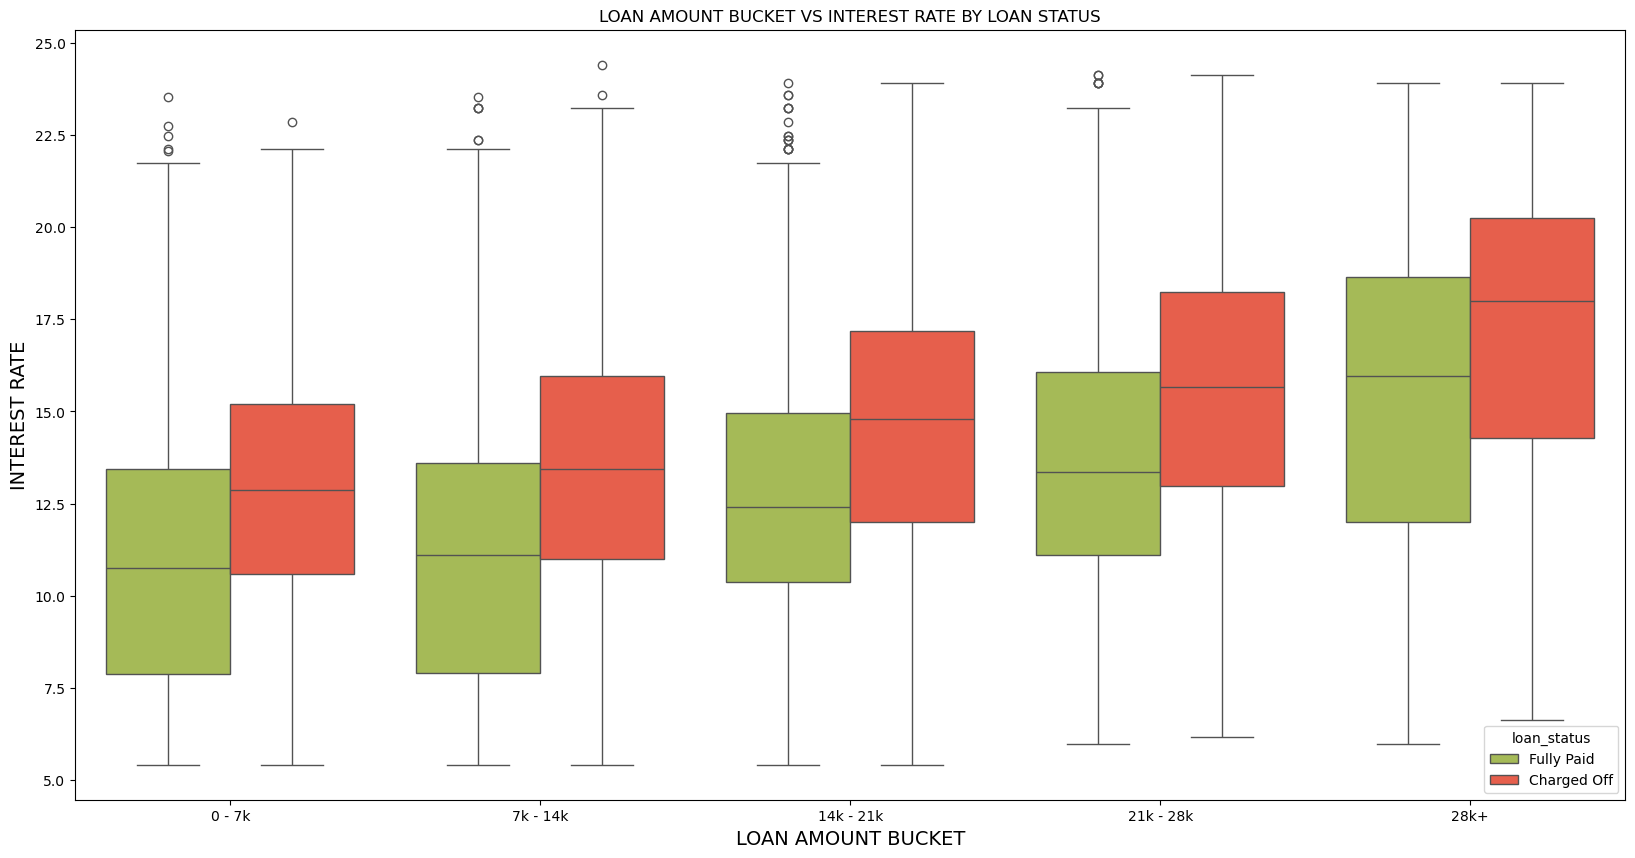

In [64]:
#For more better analysis we can do loan_amount vs interest rate. To make it easy let's create buckets for loan_amount.
df_loan["loan_amnt_bucket"] = pd.cut(df_loan["loan_amnt"], 
                               list(range(0,40001,7000)), 
                               labels = ['0 - 7k', '7k - 14k', '14k - 21k', '21k - 28k', '28k+'])
plt.figure(figsize=(20,10))
viz = sns.boxplot(x='loan_amnt_bucket', 
            y='int_rate', 
            hue = 'loan_status',
            order=df_loan.loan_amnt_bucket.value_counts().index,
            palette=['#AECB46', "#FF4C33"],
            data=df_loan)

# Naming the axis and title
viz.set_xlabel('LOAN AMOUNT BUCKET', fontsize = 14)
viz.set_ylabel('INTEREST RATE', fontsize = 14)
viz.set_title('LOAN AMOUNT BUCKET VS INTEREST RATE BY LOAN STATUS')
plt.show()

#### Observation: Loan with highest interest rate in all buckets are more likely to default.

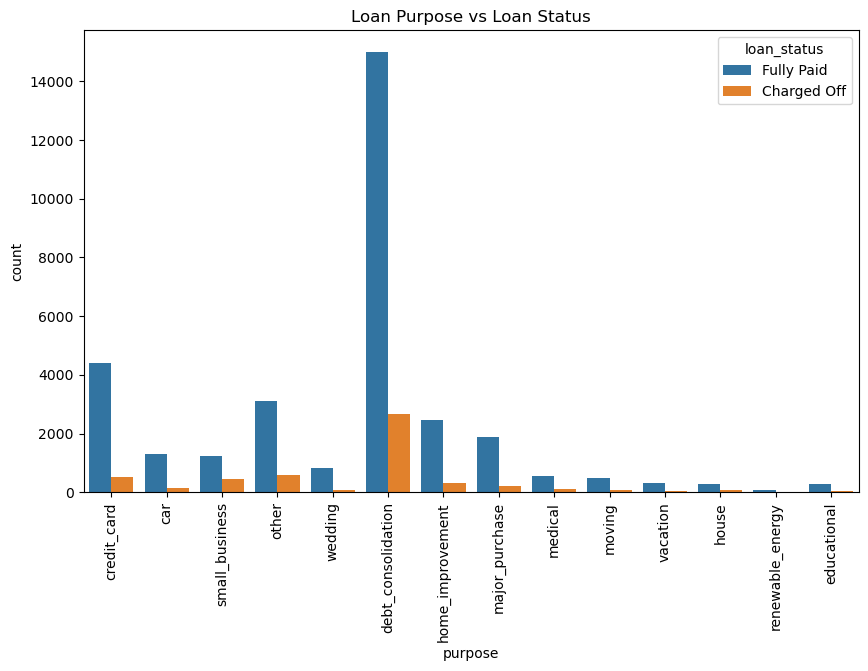

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(x='purpose', hue='loan_status', data=df_loan)
plt.title('Loan Purpose vs Loan Status')
plt.xticks(rotation=90)  # Rotate for better readability
plt.show()

#### Observation: Borrowers who take loan for debt_consolidation are most likely to default.

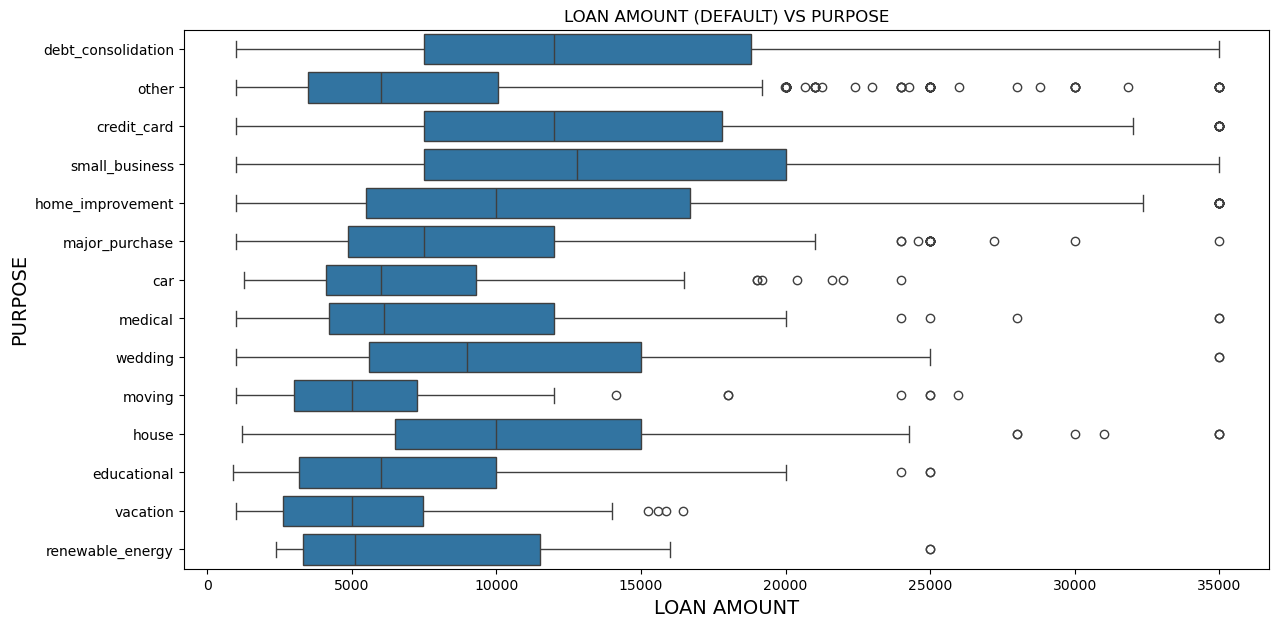

In [68]:
#But if we take loan amount against purpose for charged off rows.
charged_data = df_loan[df_loan['loan_status'] == 'Charged Off']
#We have created a seperate data frame having only charged off rows, now let's do analysis directly on that data
plt.figure(figsize=(14,7))
# Box plot for loan amount vs purpose
viz = sns.boxplot(x='loan_amnt', 
            y='purpose', 
            order=charged_data['purpose'].value_counts().index,
            data=charged_data)

# Naming the axis and title
viz.set_xlabel('LOAN AMOUNT', fontsize = 14)
viz.set_ylabel('PURPOSE', fontsize = 14)
viz.set_title('LOAN AMOUNT (DEFAULT) VS PURPOSE')
plt.show()

#### Observation: Loan for debt consolidation, credit card and small business with avg loan amount greater than 12k are more likely to default.

Text(0.5, 1.0, 'INTEREST_BUCKET (DEFAULT) VS DEFAULT COUNT')

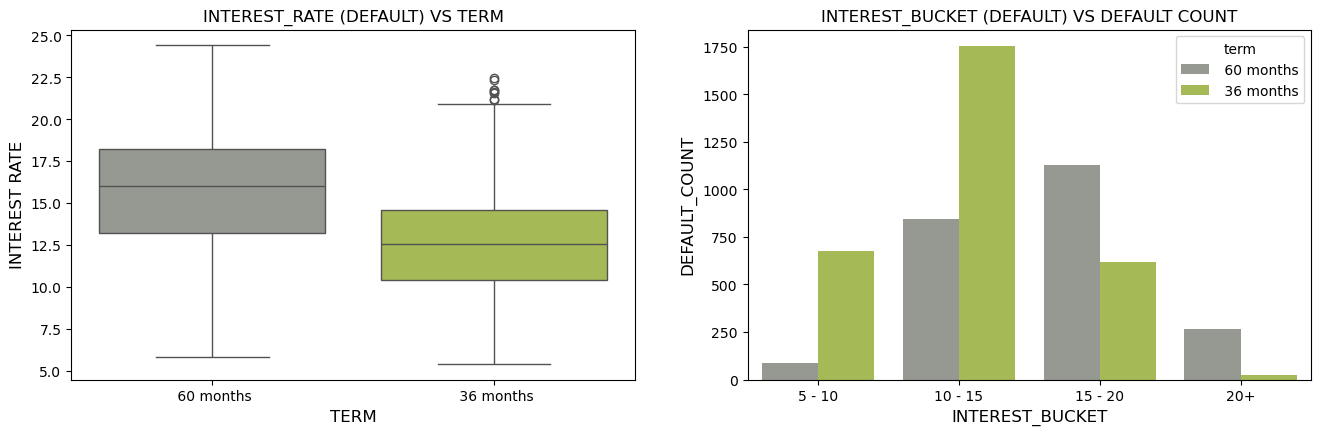

In [70]:
# Creating categorical buckets for interest rate
charged_data["int_rate_bkt"] = pd.cut(charged_data['int_rate'], 
                               list(range(5,26,5)), 
                               labels = ['5 - 10', '10 - 15', '15 - 20', '20+'])

plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
viz = sns.boxplot(y='int_rate', 
            x='term',
            palette=['#979A90',"#AECB46"],
            data=charged_data)
# Naming the axis and title
viz.set_ylabel('INTEREST RATE', fontsize = 12)
viz.set_xlabel('TERM', fontsize = 12)
viz.set_title('INTEREST_RATE (DEFAULT) VS TERM')


# Count plot for interest rate vs default count by term as hue
plt.subplot(2,2,2)
viz = sns.countplot(x=charged_data['int_rate_bkt'],
              hue=charged_data['term'], 
              palette=['#979A90', "#AECB46"],
              data = charged_data)
# Naming the axis and title
viz.set_xlabel('INTEREST_BUCKET', fontsize = 12)
viz.set_ylabel('DEFAULT_COUNT', fontsize = 12)
viz.set_title('INTEREST_BUCKET (DEFAULT) VS DEFAULT COUNT')

#### Observation: Longer tenure has the higher interest rate and people in this term with interest rate between 15-20% is more likely to charge off. Shorter tenure has the lower interest rate and people in this term with interest rate between 10-15% is more likely to charge off.

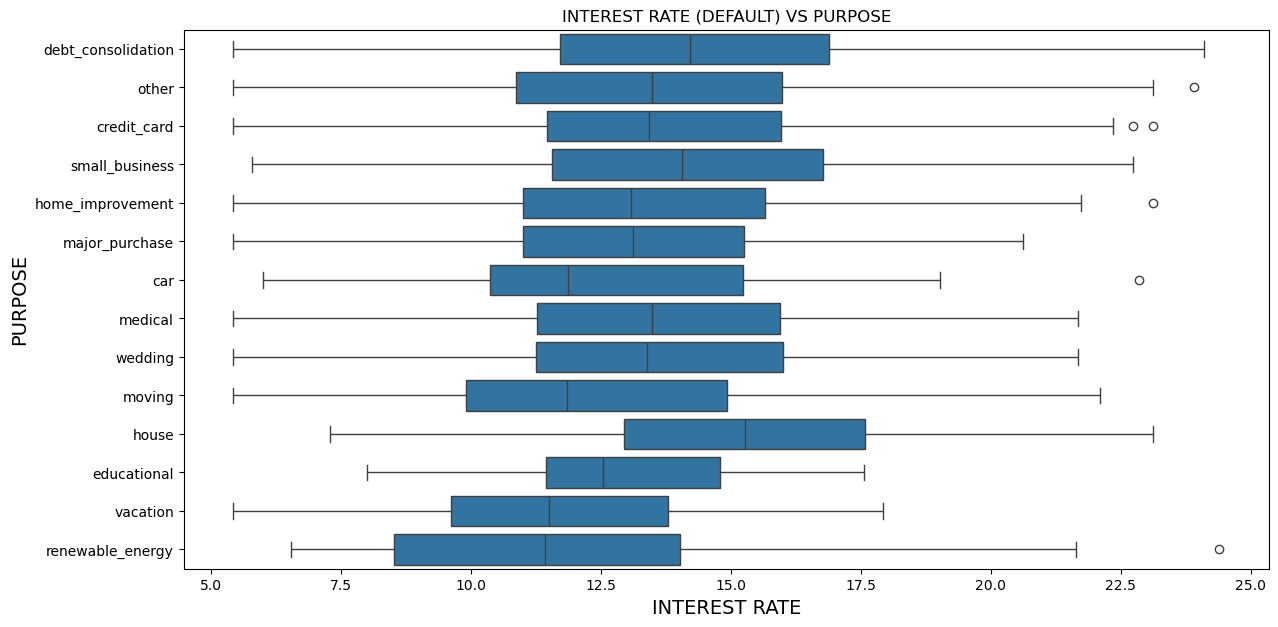

In [72]:
# Box plot for interest vs purpose
plt.figure(figsize=(14,7))
viz = sns.boxplot(x='int_rate', 
            y='purpose',
            order=charged_data['purpose'].value_counts().index,
            data=charged_data)

# Naming the axis and title
viz.set_xlabel('INTEREST RATE', fontsize = 14)
viz.set_ylabel('PURPOSE', fontsize = 14)
viz.set_title('INTEREST RATE (DEFAULT) VS PURPOSE')
plt.show()

#### Observation: If it is a higher interest rate, thy are more likely to default.

In [74]:
contingency_table = pd.crosstab(df_loan['home_ownership'], df_loan['loan_status'])
print(contingency_table)

loan_status     Charged Off  Fully Paid
home_ownership                         
MORTGAGE               2245       14350
NONE                      0           3
OTHER                    18          80
OWN                     400        2370
RENT                   2736       15342


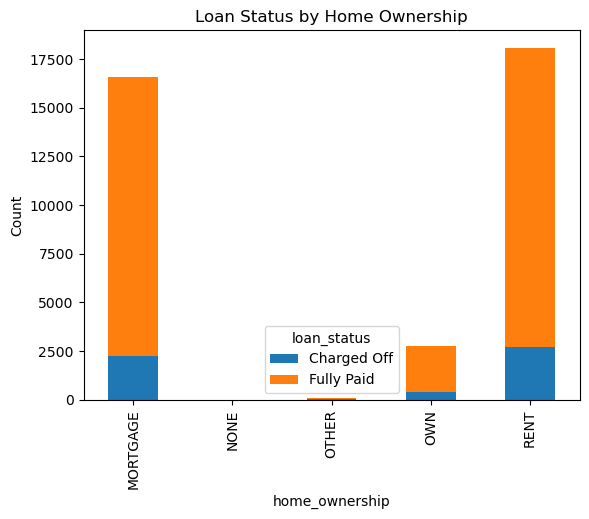

In [75]:
# Stacked bar plot
contingency_table.plot(kind='bar', stacked=True)
plt.title("Loan Status by Home Ownership")
plt.ylabel("Count")
plt.show()


#### Observation: People who stay on rent are more likely to default.

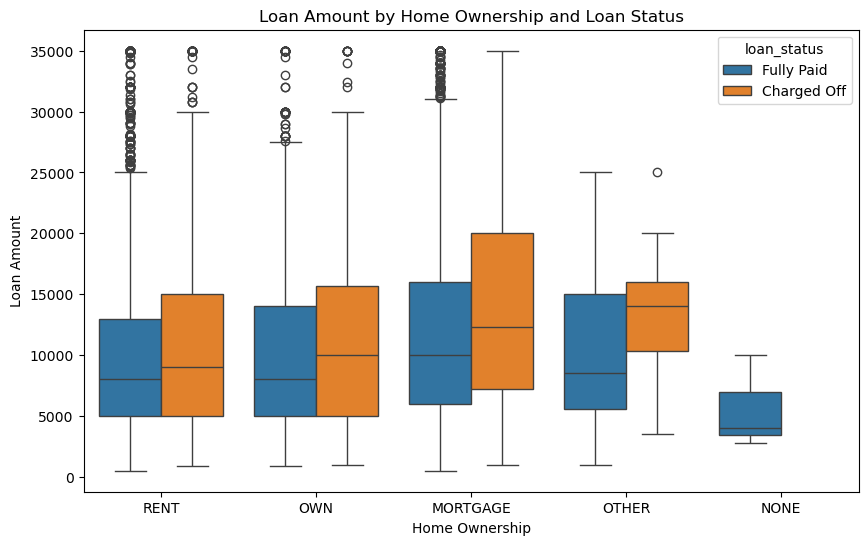

In [77]:
# To get more output out of home_ownership let's plot it against loan_amount.
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=df_loan)
plt.title('Loan Amount by Home Ownership and Loan Status')
plt.ylabel('Loan Amount')
plt.xlabel('Home Ownership')
plt.show()

#### Observation: Other than people who stay on rent the lender should focus more on people who stay on mortgage and take a big loan amount as they are more likely to default.

Text(0.5, 1.0, 'Home Ownership vs Interest Rate')

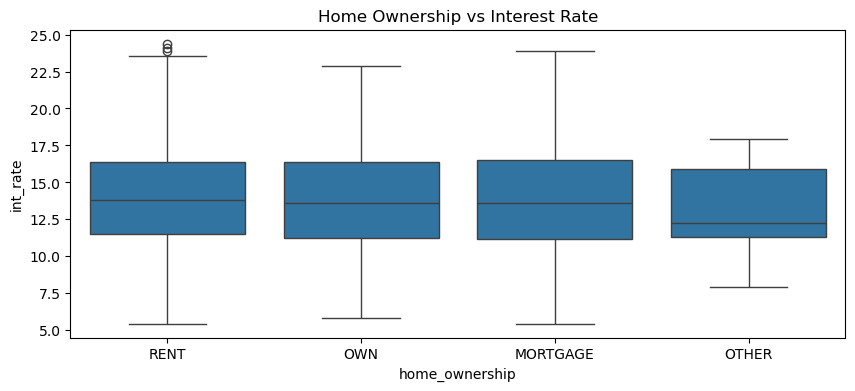

In [79]:
plt.figure(figsize=(10,4))
sns.boxplot(x="home_ownership", y="int_rate", data=charged_data)
plt.title("Home Ownership vs Interest Rate")

#### Observation: Analysis of home ownership versus interest rate reveals that borrowers who are renting tend to receive higher interest rates.

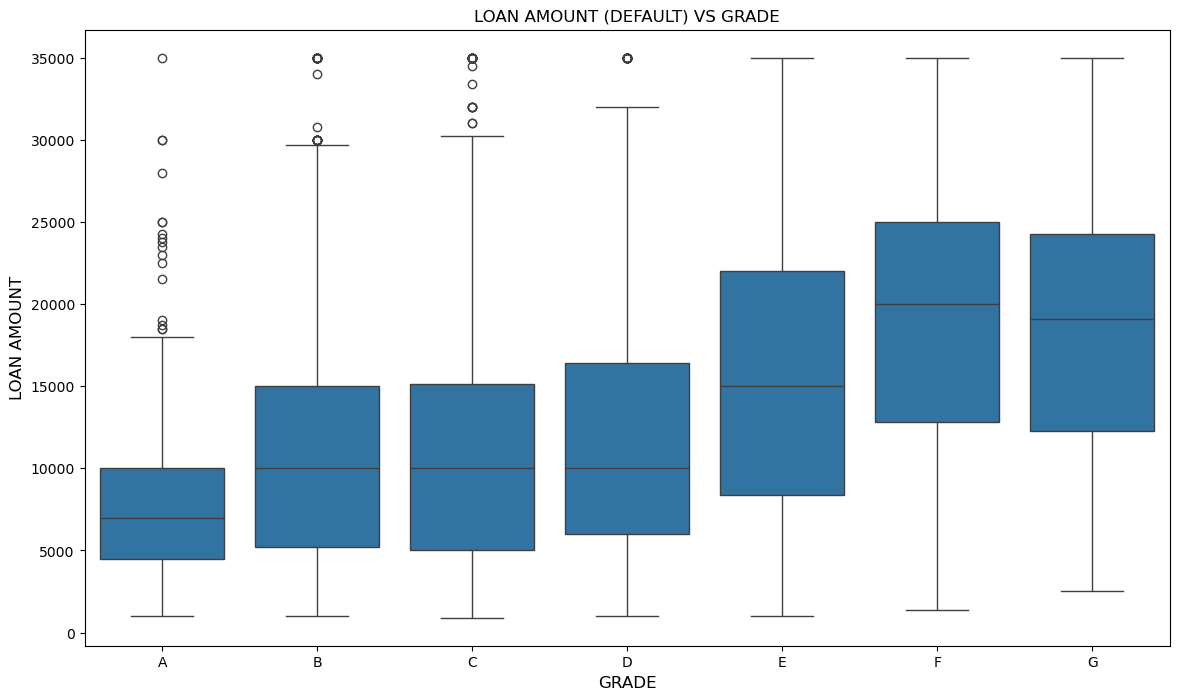

In [81]:
# Box plot for loan amount vs grade
plt.figure(figsize=(14,8))
viz = sns.boxplot(y='loan_amnt', 
            x='grade', 
            order=['A','B','C','D','E','F','G'],
            data=charged_data)

# Naming the axis and title
viz.set_ylabel('LOAN AMOUNT', fontsize = 12)
viz.set_xlabel('GRADE', fontsize = 12)
viz.set_title('LOAN AMOUNT (DEFAULT) VS GRADE')
plt.show()

#### Observation: Borrowers with grades E,F and G are more likely to default.

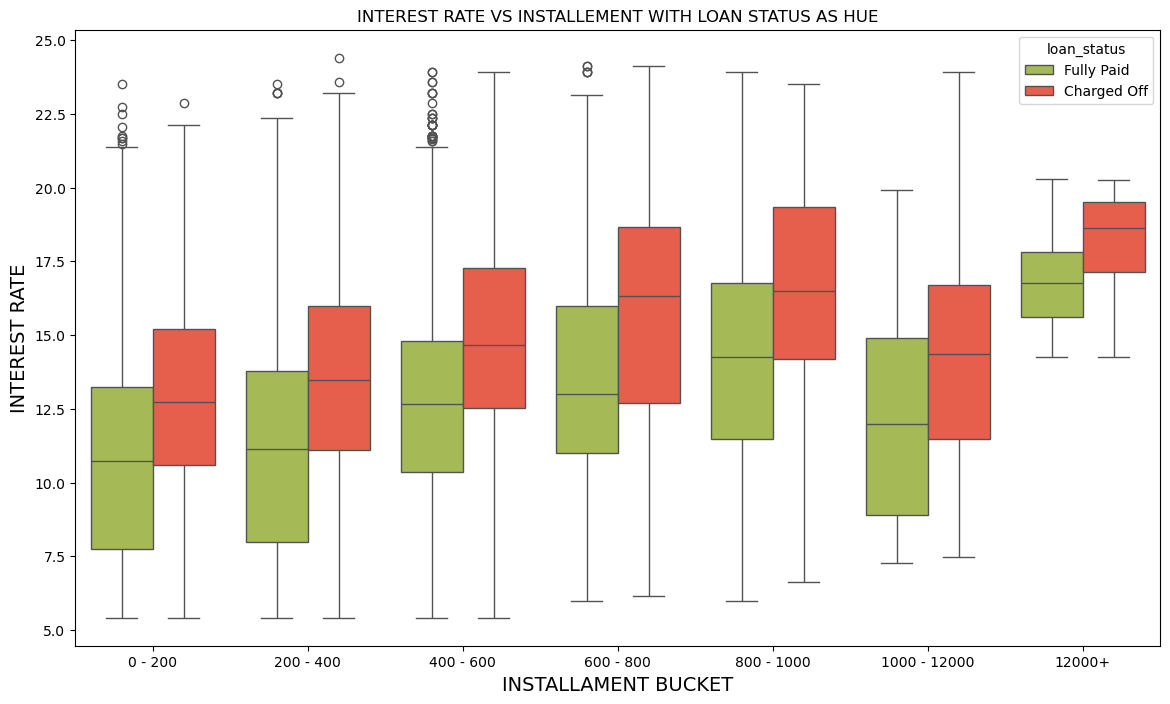

In [83]:
# Box plot for installment bucket vs interest rate by loan status as hue
# Creating categorical buckets for installment
df_loan["installment_bkt"] = pd.cut(df_loan['installment'], 
                               list(range(0,1401,200)), 
                               labels = ['0 - 200', '200 - 400', '400 - 600', '600 - 800', 
                                         '800 - 1000', '1000 - 12000', '12000+'])
plt.figure(figsize=(14,8))
viz = sns.boxplot(x='installment_bkt', 
            y='int_rate', 
            hue = 'loan_status',
            palette=['#AECB46', "#FF4C33"],
            data=df_loan)

# Naming the axis and title
viz.set_xlabel('INSTALLAMENT BUCKET', fontsize = 14)
viz.set_ylabel('INTEREST RATE', fontsize = 14)
viz.set_title('INTEREST RATE VS INSTALLEMENT WITH LOAN STATUS AS HUE')
plt.show()

#### Observation:As the number of installment increase the borrowers with high interest rate are more likely to charge off.

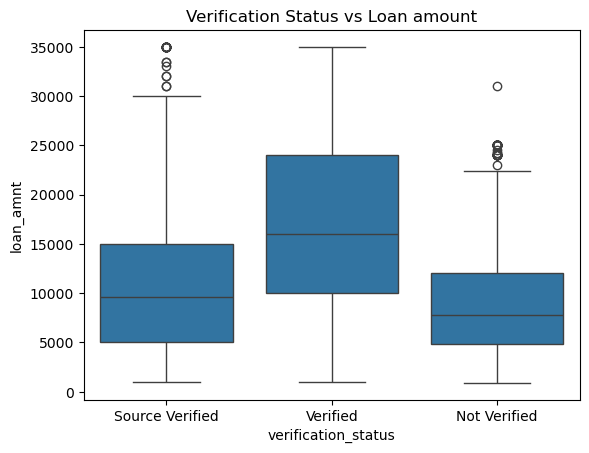

In [85]:
sns.boxplot(x="verification_status", y="loan_amnt", data=charged_data)
plt.title("Verification Status vs Loan amount")
plt.show()

#### Observation:Borrowers who are verified are only most likely to default.

Text(0.5, 1.0, 'Issue Month vs Loan amount')

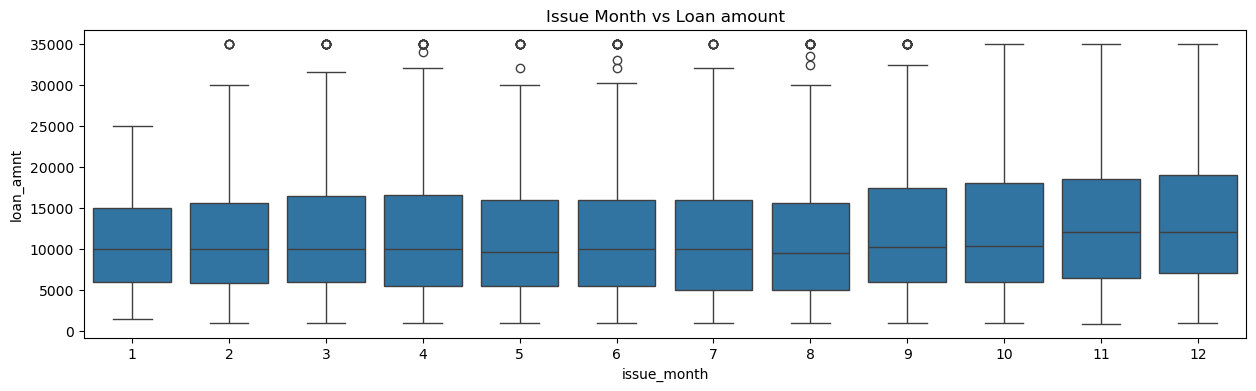

In [87]:
plt.figure(figsize=(15,4))
sns.boxplot(x="issue_month", y="loan_amnt", data=charged_data)
plt.title("Issue Month vs Loan amount")

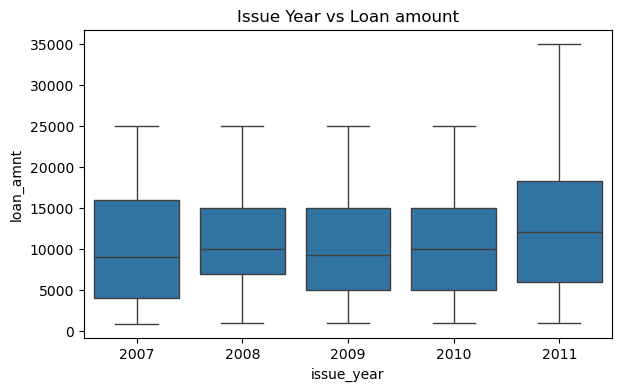

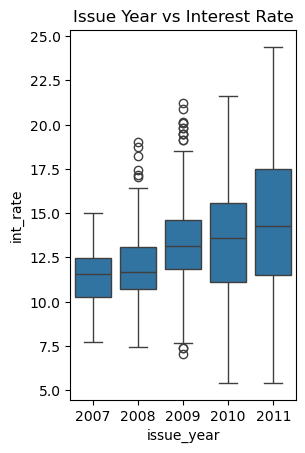

In [88]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="issue_year", y="loan_amnt", data=charged_data)
plt.title("Issue Year vs Loan amount")
plt.show()
plt.subplot(1,2,2)
sns.boxplot(x="issue_year", y="int_rate", data=charged_data)
plt.title("Issue Year vs Interest Rate")
plt.show()

#### Observation: For loan amount by issue month, The highest loan amounts occur in December and May who are most likely to default. For issue year and loan amount, the highest loan amounts are observed in 2008 and 2011 who are most likely to default. As we go from 2007-2011 on the rate of interest is getting diversed but the median remains same throughout the years.

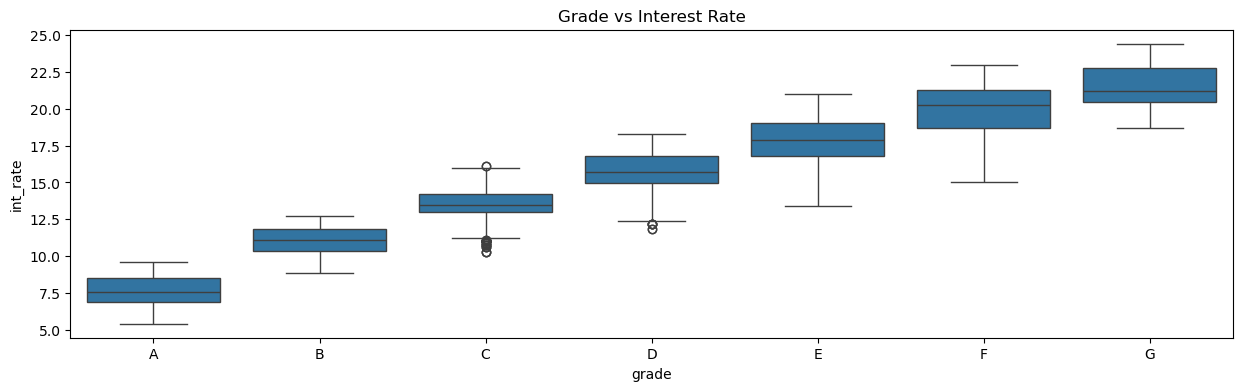

In [90]:
plt.figure(figsize=(15,4))
grading = charged_data["grade"].unique()
grading.sort()
sns.boxplot(x="grade", y="int_rate", order= grading, data=charged_data)
plt.title("Grade vs Interest Rate")
plt.show()

#### Observation: As we go down the grades the interest rates keep increasing.

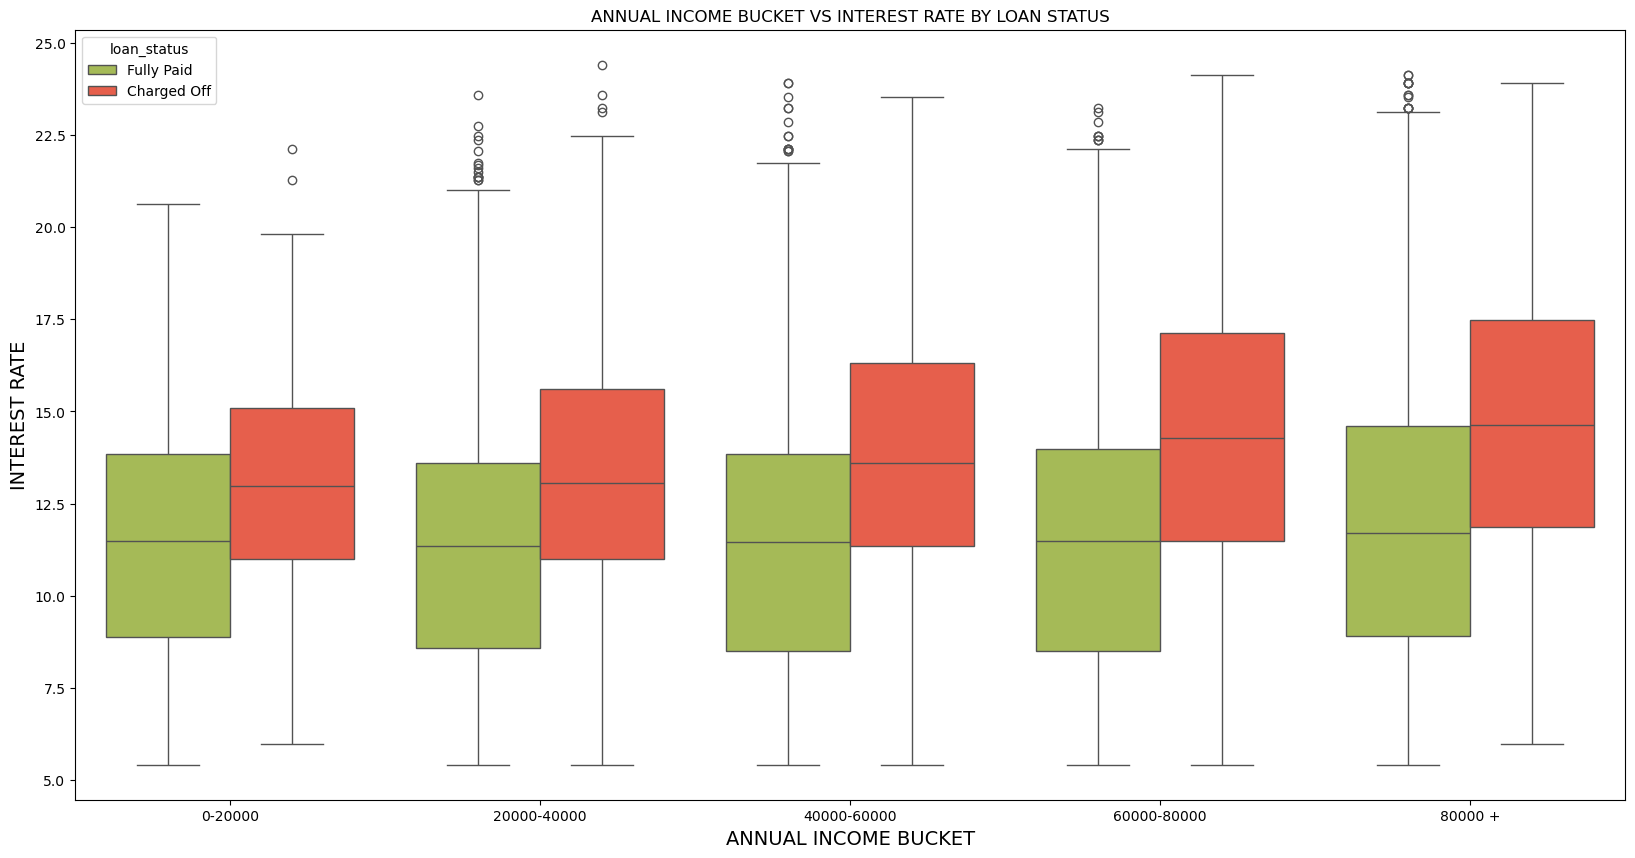

In [92]:
# Group annual income into categories for further analysis.
df_loan['annual_inc_bucket'] = pd.cut(df_loan['annual_inc'],
                                            [0, 20000, 40000, 60000, 80000,1000000],
                                            labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

plt.figure(figsize=(20,10))
viz = sns.boxplot(x='annual_inc_bucket', 
            y='int_rate', 
            hue = 'loan_status',
            palette=['#AECB46', "#FF4C33"],
            data=df_loan)

# Naming the axis and title
viz.set_xlabel('ANNUAL INCOME BUCKET', fontsize = 14)
viz.set_ylabel('INTEREST RATE', fontsize = 14)
viz.set_title('ANNUAL INCOME BUCKET VS INTEREST RATE BY LOAN STATUS')
plt.show()

#### Observation: As income increases the chances of getting charged off is increasing

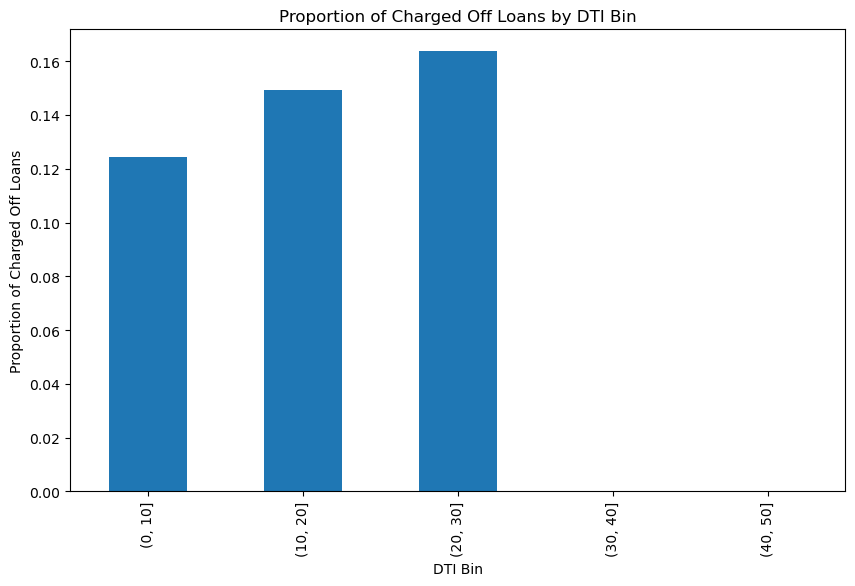

In [94]:
# Create DTI bins
df_loan['dti_bin'] = pd.cut(df_loan['dti'], bins=[0, 10, 20, 30, 40, 50])

# Proportion of Charged Off loans in each DTI bin
charged_off_proportion = df_loan.groupby('dti_bin')['loan_status'].apply(lambda x: (x == 'Charged Off').mean())

# Plot
charged_off_proportion.plot(kind='bar', figsize=(10, 6))
plt.title('Proportion of Charged Off Loans by DTI Bin')
plt.ylabel('Proportion of Charged Off Loans')
plt.xlabel('DTI Bin')
plt.show()

#### Observation: Borrowers having DTI value around 20-30 are more likely to default.

### 2.3.MutliVariate analysis

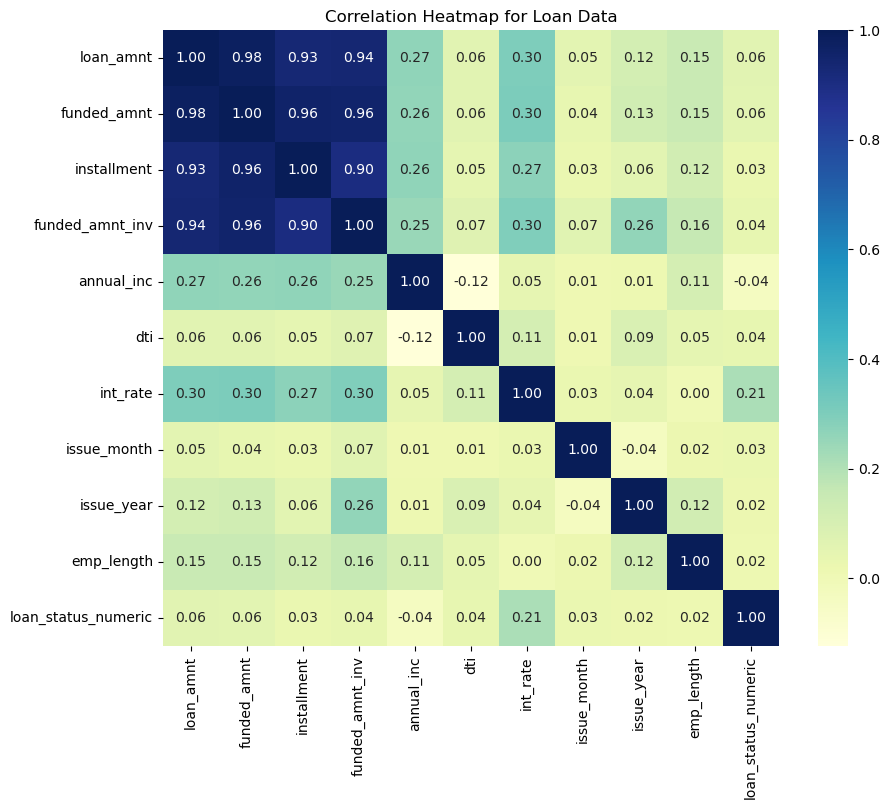

In [97]:
# Heatmap of correlation between variables
# Convert loan_status to numeric for correlation
df_loan['loan_status_numeric'] = df_loan['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})

# Select relevant numerical columns for correlation
selected_columns = ['loan_amnt', 'funded_amnt','installment','funded_amnt_inv','annual_inc', 'dti', 'int_rate', 'issue_month','issue_year','emp_length','loan_status_numeric']

# Filter the relevant columns
loan_data_filtered = df_loan[selected_columns]

# Convert any non-numeric data to numeric and coerce invalid parsing to NaN
loan_data_filtered_clean = loan_data_filtered.apply(pd.to_numeric, errors='coerce')

# Handle missing values by filling them with the median
loan_data_filtered_clean.fillna(loan_data_filtered_clean.median(), inplace=True)

# Compute the correlation matrix
correlation = loan_data_filtered_clean.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='YlGnBu', square=True, fmt='.2f')
plt.title('Correlation Heatmap for Loan Data')
plt.show()

#### Observation: loan amount,funded amount,funded amount invested and installement are all highly correlated.
#### Intrest rate goes high chances of loan becoming default is slight more.
#### When annual income is high debt tends to be lower